# Model training

#### BTC-USDT for ROR_n10

<br>

#### Model ID | Model Execution ID pairs

```
model_id: 584eba7f00ec5176bafd1feaafcc46fc8382830a
    - n_estimators = 500
    - max_depth = 10
    - Mean Absolute Error: 0.03025
    - Mean Absolute Outcome: 0.01991
    - Mean Absolute Percent Error: 1.51939
    - Error Variance: 0.00188
    - R-Squared: -0.74909
```


```
model_id: 46712697629b95bc495fc9a83f5d4b86e2a3a82f
    - n_estimators = 500
    - max_depth = 20
    - Mean Absolute Error:	 0.03385
    - Mean Absolute Outcome:	 0.01991
    - Mean Absolute Percent Error:	 1.70031
    - Error Variance:	 0.00262
    - R-Squared:		 -1.43567
```


#### Resources
+ [BigQuery](https://console.cloud.google.com/bigquery?folder=&organizationId=&project=algomosaic-nyc)
+ [Storage](https://console.cloud.google.com/storage/browser/algom-trading/models/?project=algomosaic-nyc)



<br> 

#### Requirements


In [1]:
import numpy as np
from algom import configs
from algom.utils.data_object import dataObject
from algom.model_regression import modelRegression
from algom.model_plots import modelPlots

<br>

### Load training data


In [2]:
# Load model data
data = dataObject("""
SELECT * EXCEPT (
  conversionType,
  conversionSymbol,
  partition_date)
FROM `algom-trading.train_features.features_BTC_USDT_hour_i02_20200101`
""")

RUNNING: Querying SQL script.


Downloading: 100%|██████████| 10001/10001 [00:12<00:00, 795.26rows/s]

SUCCESS: Loaded SQL query.


In [3]:
# Drop nan values
data.df = data.df.replace([np.inf, -np.inf], np.nan).dropna()
print(len(data.df))
data.df.head()

9503


,ticker_time_sec,close,high,low,open,volume_base,volume,etl_time,ticker_time,ticker,...,MACDdiff_9_12,MACD_26_200,MACDsign_26_200,MACDdiff_26_200,MACD_20_200,MACDsign_20_200,MACDdiff_20_200,RSI_,Mass_Index_9_25,SO_pct_k
301,1608375600,22888.54,23063.49,22875.01,23019.99,1942.20,44613867.52,2021-01-01 15:41:59.341772+00:00,2020-12-19 11:00:00+00:00,BTC-USDT,...,-23419.784968,-481.114204,23351.657913,-23832.772118,-499.006097,23351.657913,-23850.664010,0.078191,25.147763,0.071785
302,1608372000,23019.99,23080.45,22950.00,22973.06,2332.00,53679672.53,2021-01-01 15:41:59.341772+00:00,2020-12-19 10:00:00+00:00,BTC-USDT,...,-23358.278049,-507.744985,23285.324331,-23793.069315,-534.465556,23285.324331,-23819.789887,0.156312,25.113732,0.536527
303,1608368400,22973.06,23045.49,22928.05,22983.77,2229.93,51261037.96,2021-01-01 15:41:59.341772+00:00,2020-12-19 09:00:00+00:00,BTC-USDT,...,-23299.013734,-534.743054,23222.871465,-23757.614519,-569.664508,23222.871465,-23792.535973,0.134228,24.992332,0.383260
304,1608364800,22983.77,22990.00,22750.00,22853.75,3048.67,69730044.00,2021-01-01 15:41:59.341772+00:00,2020-12-19 08:00:00+00:00,BTC-USDT,...,-23250.514698,-558.389875,23175.051172,-23733.441047,-599.708531,23175.051172,-23774.759703,0.049367,24.905168,0.974042
305,1608361200,22853.75,23038.00,22832.00,22853.50,1791.21,41091629.41,2021-01-01 15:41:59.341772+00:00,2020-12-19 07:00:00+00:00,BTC-USDT,...,-23189.473975,-587.903180,23110.790937,-23698.694118,-637.041300,23110.790937,-23747.832238,0.242920,24.817013,0.105583


<br>

### Initialize modelRegression class

In [13]:
# Initialize model class
model = modelRegression(
    data, 
    outcome='ROR_n20',
    model_id='46712697629b95bc495fc9a83f5d4b86e2a3a82f',
    index_features=configs.INDEX_FEATURES, 
    omit_features=configs.OMIT_FEATURES
)

SUCCESS: Loaded dataObject.
SUCCESS: Model 46712697629b95bc495fc9a83f5d4b86e2a3a82f has been loaded successfully.
Downloaded file from GCS to: /home/jovyan/algomosaic/data/models/20210102_GradientBoostingRegressor_46712697629b95bc495fc9a83f5d4b86e2a3a82f.pickle
Initialized model. As a next step, run self.predict() or self.train().


In [14]:
# Validate model
model.predict()


Model metadata added to `self.metadata.metadata`
Model metadata added to `self.metadata.parameters`
Get model performance.
Set R^2 to `self.rsquared`
The following performance measures have been added:
                - self.mean_abs_error
                - self.mean_abs_outcome
                - self.mean_abs_pct_error
                - self.error_var
            
Performance metrics added to `self.performance`

MODEL PERFORMANCE SUMMARY
        - Mean Absolute Error:	 0.03385
        - Mean Absolute Outcome:	 0.01991
        - Mean Absolute Percent Error:	 1.70031
        - Error Variance:	 0.00262
        - R-Squared:		 -1.43567
        
PLOT PREDICTIONS: Use the following commandsto view model performance.
              `self.plot_predictions_by_date(start_date, end_date)`
              `self.plot_predictions_histogram(start_date, end_date)`
              `self.plot_errors_by_date(start_date, end_date)`
              `self.plot_errors_histogram(start_date, end_date)`
              

In [15]:
# Model IDs
print('model_id: ' + model.model_id)
print('model_execution_id: ' + model.model_execution_id)


model_id: 46712697629b95bc495fc9a83f5d4b86e2a3a82f
model_execution_id: 8f72d22fef262ab637221a504a3de6b6723385bf


<br>

## View performance 

+ Trending predictions vs outcomes
+ Histogram of predictions vs outcomes


In [7]:
start_date='2020-04-01'
end_date='2020-04-15'
%matplotlib inline
model_plot = modelPlots(model)

PLOT: Predictions by Date
        `self.plot_predictions_by_date(start_date, end_date)`


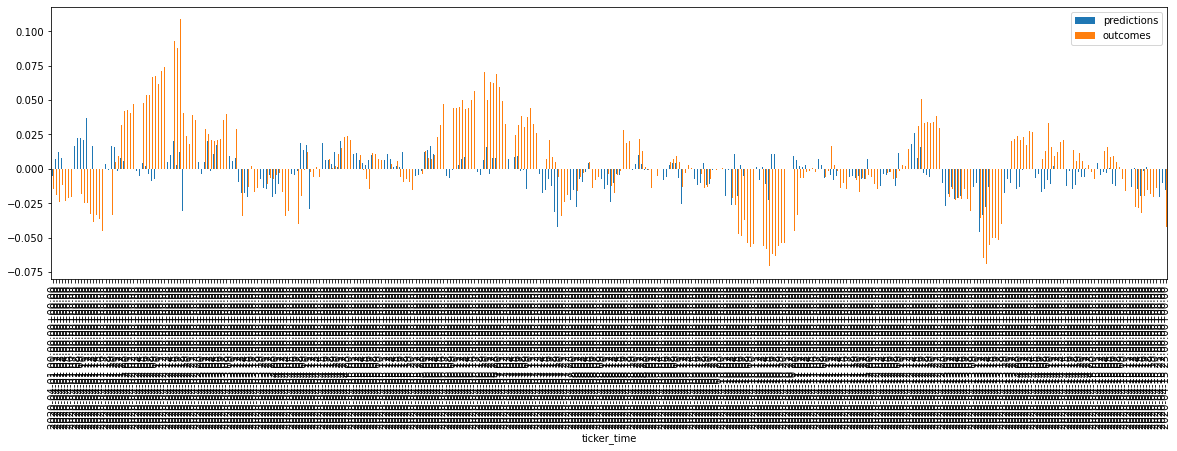

In [8]:
model_plot.plot_predictions_by_date(start_date, end_date)

PLOT: Prediction Errors by Date`


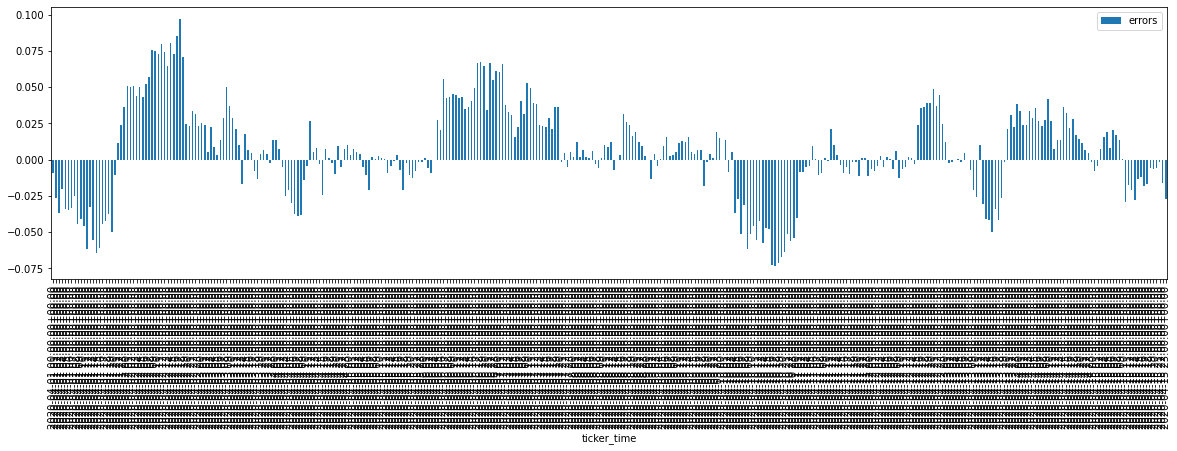

In [9]:
model_plot.plot_errors_by_date(start_date, end_date)

PLOT: Predictions Histogram


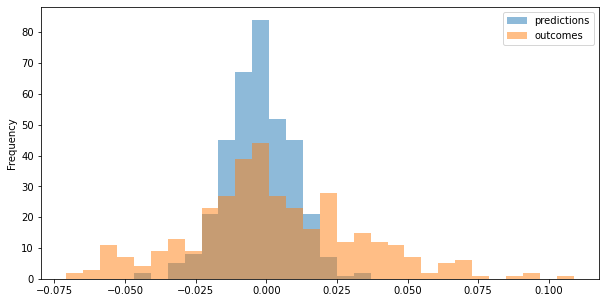

In [10]:
model_plot.plot_predictions_histogram(start_date, end_date)

PLOT: Predictions Histogram


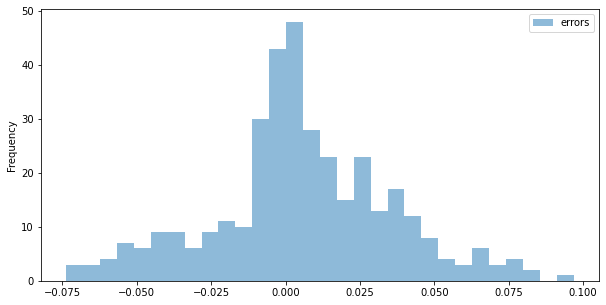

In [11]:
model_plot.plot_errors_histogram(start_date, end_date)


PLOT: Predictions by Date


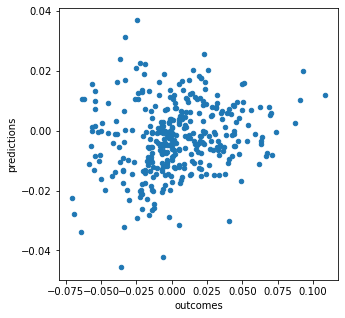

In [12]:
model_plot.plot_predictions_scatterplot(start_date, end_date)

<br>

### View trending features


In [28]:
start_date = '2016-01-01'
end_date = '2017-01-01'
%matplotlib inline 

# from data_mgmt import data_mgmt as dm

model_plot.plot_features(
    df = model.df, 
    x = 'ticker_time', 
    y = 'ROR_n10',
    start_date=start_date, 
    end_date=end_date
)

AttributeError: 'modelPlots' object has no attribute 'plot_features'

In [ ]:
model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'ATR_7',
    start_date=start_date, end_date=end_date, chart_type = 'line')

model_plot.plot_features(df = model.df, x = 'ticker_time', y = 'EMA_20',
    start_date=start_date, end_date=end_date, chart_type='line')
